In [225]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Analyzed dataset was downloaded from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine+quality). It was created by P.Corez et.al. and used in: "Modeling wine preferences by data mining from physicochemical properties" [P.Cortez et al., 2009]. Dataset holds data related to red wine variants of the Portuguese "Vinho Verde". Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The main goal of my analysis was to detect which features mostly influence the sensory reception of red wine and if those features are the same for red and white wine (white wine dataset will be analyzed in another notebook).     

Second goal of analysis was to check which ML model will perform best for this dataset. 

In [226]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [227]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [228]:
red_wine.shape

(1599, 12)

In [229]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Analyzed dataset is a table of 12 columns (features) and 1599 rows (observations). There are no null values.

Eleven features are the explanatory variables, all are quantitative continous data. Described below based on [P.Cortez et al., 2009]:
- Fixed Acidity - describes content of tartaric acid [g/dm<sup>3</sup>];
- Volatile Acidity - describes content of acetic acid [g/dm<sup>3</sup>];
- Citric Acid, [g/dm<sup>3</sup>];
- Residual Sugar, [g/dm<sup>3</sup>];
- Chlorides - content of sodium chloride [g/dm<sup>3</sup>];
- Free Sulfur Dioxide, [mg/dm<sup>3</sup>];
- Total Sulfur Dioxide, [mg/dm<sup>3</sup>];
- Density, [g/dm<sup>3</sup>];
- pH;
- Sulphates - content of potassium sulphate [g/dm<sup>3</sup>];
- Alcohol [%vol].
    
The target (explained) feature is: 
- Quality - evaluated by three sensory assessors, by means of blind tastes, which graded the wine in a scale that ranges from 0 to 10 (from very bad to excellent quality, respectively) [P.Cortez et al., 2009].

<H2> Exploratory data analysis</H2>
<H3> Single feature analysis </H3>

In [230]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


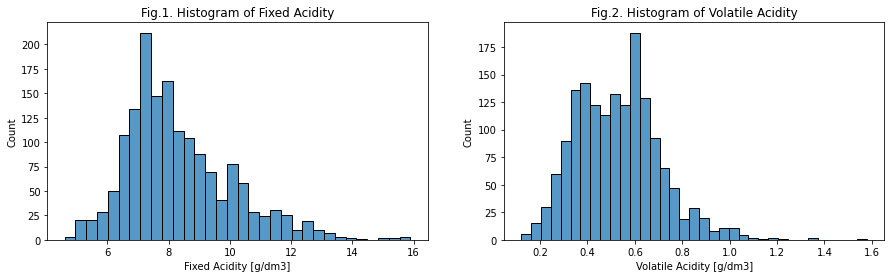

In [231]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=red_wine, x='fixed acidity')
plt.xlabel('Fixed Acidity [g/dm3]')
plt.title('Fig.1. Histogram of Fixed Acidity')
plt.subplot(1,2,2)
sns.histplot(data=red_wine, x='volatile acidity')
plt.xlabel('Volatile Acidity [g/dm3]')
plt.title('Fig.2. Histogram of Volatile Acidity')
plt.show()

- Minimum content of Fixed Acidity is 4.6 g/dm3, maximum is 15.9 g/dm3. Mean value is 8.32 g/dm3, higher than median (7.9 g/dm3). Histogram is unimodal and right skewed (Fig.1.).
- Minimum content of Volatile Acidity is 0.12 g/dm3, maximum is 1.58 g/dm3. Mean value is 0.53 g/dm3, slightly higher than median (0.52 g/dm3). Histogram is bimodal and right skewed (Fig.2.).

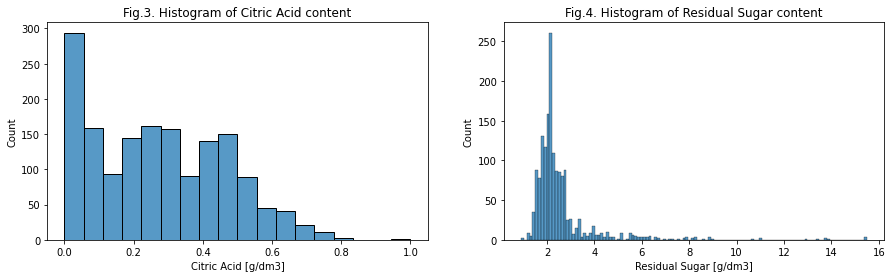

In [232]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=red_wine, x='citric acid')
plt.xlabel('Citric Acid [g/dm3]')
plt.title('Fig.3. Histogram of Citric Acid content')
plt.subplot(1,2,2)
sns.histplot(data=red_wine, x='residual sugar')
plt.xlabel('Residual Sugar [g/dm3]')
plt.title('Fig.4. Histogram of Residual Sugar content')
plt.show()

- Minimum content of Citric Acid is 0.0 g/dm3, maximum is 1.0 g/dm3. Mean value is 0.27 g/dm3, higher than median (0.26 g/dm3). Histogram has three maxima and is right skewed (Fig.3.).
- Minimum content of Residual Sugar is 0.9 g/dm3, maximum is 15.5 g/dm3. Mean is 2.54 g/dm3, higher than median (2.2 g/dm3). Histogram is unimodal and right skewed. A lot of outliers can be observed (Fig.4.).

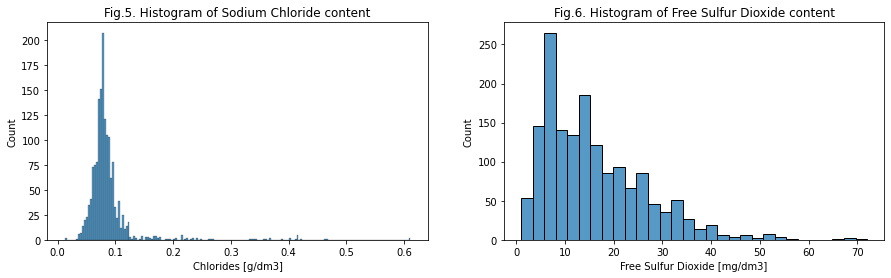

In [233]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=red_wine, x='chlorides')
plt.xlabel('Chlorides [g/dm3]')
plt.title('Fig.5. Histogram of Sodium Chloride content')
plt.subplot(1,2,2)
sns.histplot(data=red_wine, x='free sulfur dioxide')
plt.xlabel('Free Sulfur Dioxide [mg/dm3]')
plt.title('Fig.6. Histogram of Free Sulfur Dioxide content')
plt.show()

- Minimum content of Sodium Chloride 0.012 g/dm3, maximum is 0.611 g/dm3. Mean value is 0.087 g/dm3, higher than median (0.079 g/dm3). Histogram is unimodal and right skewed. A lot of outliers can be observed (Fig.5.).
- Minimum content of Free Sulfur Dioxide is 1.0 mg/dm3, maximum is 172.0 mg/dm3. Mean is 15.9 mg/dm3, higher than median (14.0 mg/dm3). Histogram is unimodal and right skewed (Fig.6.).

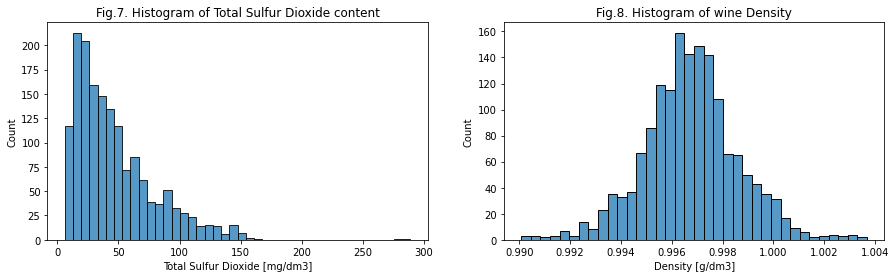

In [234]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=red_wine, x='total sulfur dioxide')
plt.xlabel('Total Sulfur Dioxide [mg/dm3]')
plt.title('Fig.7. Histogram of Total Sulfur Dioxide content')
plt.subplot(1,2,2)
sns.histplot(data=red_wine, x='density')
plt.xlabel('Density [g/dm3]')
plt.title('Fig.8. Histogram of wine Density')
plt.show()

- Minimum content of Total Sulfur Dioxide 6.0 mg/dm3, maximum is 289.0 mg/dm3. Mean value is 46.5 mg/dm3, higher than median (38.0 mg/dm3). Histogram is unimodal and right skewed. There are a few outliers (Fig.7.).
- Minimum wine Density is 0.990 g/dm3, maximum is 1.004 g/dm3. Mean is 0.997 g/dm3, similar to median (0.997 g/dm3). Histogram is unimodal and symmetrical (Fig.8.).

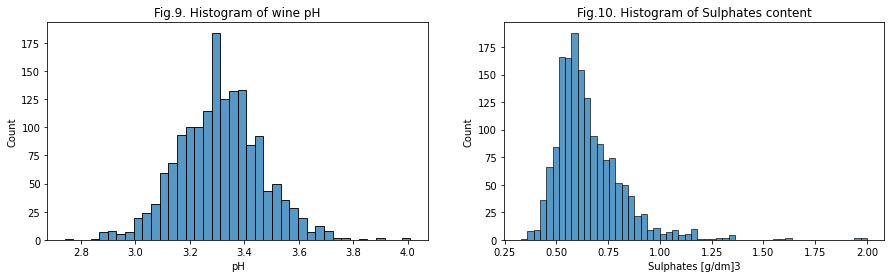

In [235]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=red_wine, x='pH')
plt.title('Fig.9. Histogram of wine pH')
plt.xlabel('pH')
plt.subplot(1,2,2)
sns.histplot(data=red_wine, x='sulphates')
plt.title('Fig.10. Histogram of Sulphates content')
plt.xlabel('Sulphates [g/dm]3')
plt.show()

- Minimum wine pH is 2.74, maximum is 4.01. Mean value is 3.31, exactly the same like median. Histogram is unimodal and symmetrical (Fig.9.).
- Minimum content of Potassium Sulphate is 0.33 g/dm3, maximum is 2.00 g/dm3. Mean value is 0.66 g/dm3, higher than median (0.62 g/dm3). Histogram is unimodal and right skewed. There are a few outliers (Fig.10.).

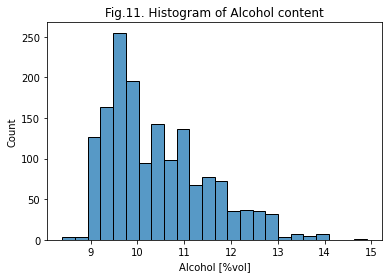

In [236]:
sns.histplot(data=red_wine, x='alcohol')
plt.xlabel('Alcohol [%vol]')
plt.title('Fig.11. Histogram of Alcohol content')
plt.show()

- Minimum Alcohol content is 8.4 %vol, maximum is 14.9 %vol. Mean value is 10.4 %vol, higher than median (10.2 %vol). Histogram is unimodal and right skewed (Fig.11.).

<H3>Target variable</H3>

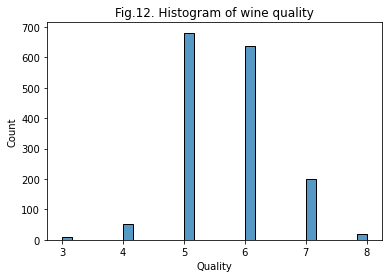

In [237]:
sns.histplot(data=red_wine, x='quality')
plt.xlabel('Quality')
plt.title('Fig.12. Histogram of wine quality')
plt.show()

In [238]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- As it can be seen on Fig.12., analyzed dataset is unbalanced, there are far more samples for 5 and 6 quality points (average taste) than for other. This issue will be addressed furhter. 

<H3>Correlation with target variable</H3>

In [239]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


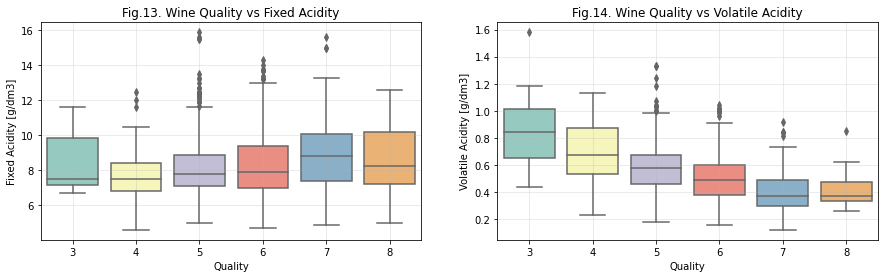

In [240]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x=red_wine['quality'], y=red_wine['fixed acidity'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity [g/dm3]')
plt.title('Fig.13. Wine Quality vs Fixed Acidity')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.boxplot(x=red_wine['quality'], y=red_wine['volatile acidity'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity [g/dm3]')
plt.title('Fig.14. Wine Quality vs Volatile Acidity')
plt.grid(alpha = 0.3)
plt.show()

- There is no clear dependence between Fixed Acidity (tartaric acid content) and wine taste, however the best wines contain slightly more tartaric acid than others (Fig.13.).
- Quality of wine is inversely proportional to the Volatile Acidity (acetic acid content; Fig.14.).

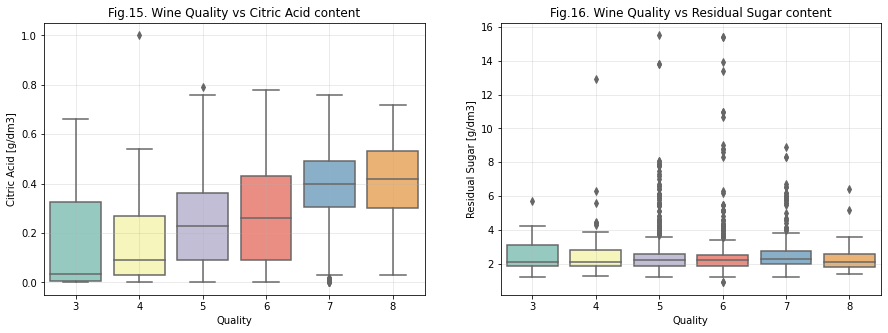

In [241]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=red_wine['quality'], y=red_wine['citric acid'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Citric Acid [g/dm3]')
plt.title('Fig.15. Wine Quality vs Citric Acid content')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.boxplot(x=red_wine['quality'], y=red_wine['residual sugar'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar [g/dm3]')
plt.title('Fig.16. Wine Quality vs Residual Sugar content')
plt.grid(alpha = 0.3)
plt.show()

- Quality of wine is proportional to the Citric Acid content. The best wines contain over 0.4 g/dm3 of Citric Acid (Fig.15.).
- There is no clear dependence between content of Residual Sugar and wine taste, hovewer the best wines (8 points) doesn't have much sugar than 7.0 g/dm3 (Fig.16.).

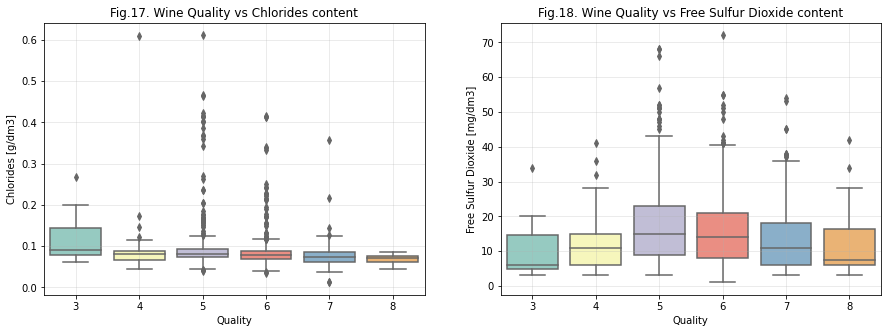

In [242]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=red_wine['quality'], y=red_wine['chlorides'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Chlorides [g/dm3]')
plt.grid(alpha = 0.3)
plt.title('Fig.17. Wine Quality vs Chlorides content')
plt.subplot(1,2,2)
sns.boxplot(x=red_wine['quality'], y=red_wine['free sulfur dioxide'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide [mg/dm3]')
plt.title('Fig.18. Wine Quality vs Free Sulfur Dioxide content')
plt.grid(alpha = 0.3)
plt.show()

- Quality of wine is slightly inversely proportional to the Chlorides content (Fig.17.).
- There is no clear dependence between content of Free Sulfur Dioxide (FSD) and wine taste, hovewer interestingly, the best wines (8 points) and the worse ones (3 points) have the lowest mean FSD values (Fig.18.).

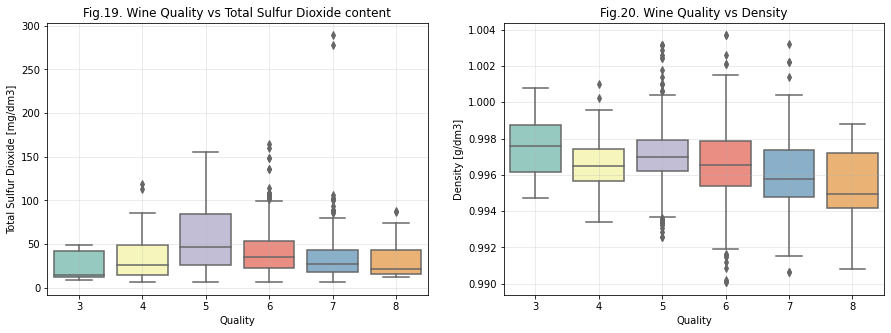

In [243]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=red_wine['quality'], y=red_wine['total sulfur dioxide'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide [mg/dm3]')
plt.title('Fig.19. Wine Quality vs Total Sulfur Dioxide content')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.boxplot(x=red_wine['quality'], y=red_wine['density'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Density [g/dm3]')
plt.title('Fig.20. Wine Quality vs Density')
plt.grid(alpha = 0.3)

plt.show()

- As in the case of FSD, there is no clear dependence between content of Total Sulfur Dioxide (TSD) and wine taste. Also in this case the best wines (8 points) and the worse ones (3 points) have the lowest mean TSD values (Fig.19.). There are two outliers.
- Quality of wine is inversely proportional to the Density (Fig.20.).

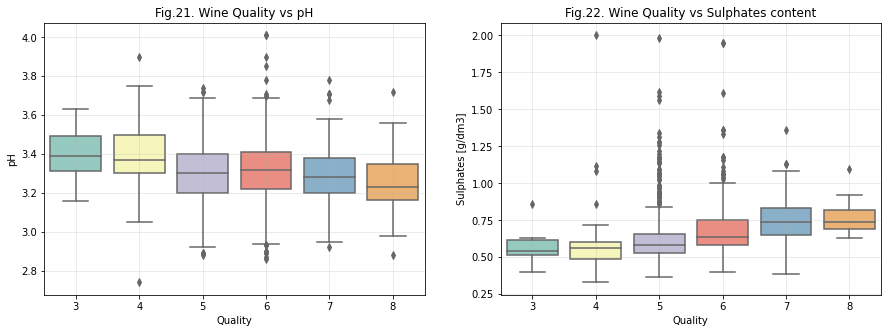

In [244]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=red_wine['quality'], y=red_wine['pH'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Fig.21. Wine Quality vs pH')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.boxplot(x=red_wine['quality'], y=red_wine['sulphates'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Sulphates [g/dm3]')
plt.title('Fig.22. Wine Quality vs Sulphates content')
plt.grid(alpha = 0.3)
plt.show()

- Quality of wine is slightly inversely proportional to pH (Fig.21.).
- Quality of wine is proportional to potassium sulphate content (Fig.22.).

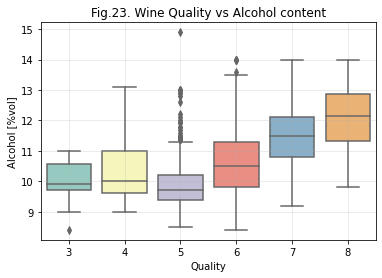

In [245]:
sns.boxplot(x=red_wine['quality'], y=red_wine['alcohol'], palette='Set3')
plt.xlabel('Quality')
plt.ylabel('Alcohol [%vol]')
plt.title('Fig.23. Wine Quality vs Alcohol content')
plt.grid(alpha = 0.3)
plt.show()

- The correlation between Alcohol content and wine quality is not linear. However it is clearly visible (Fig.23.), that the best wines tend to have more alcohol.

Correlated features
- idea and code based on notebook from Kaggle, author YANA DAV (https://www.kaggle.com/yanadav/eda-preprocessing-linear-regression/notebook#Linear-Regression)

<AxesSubplot:>

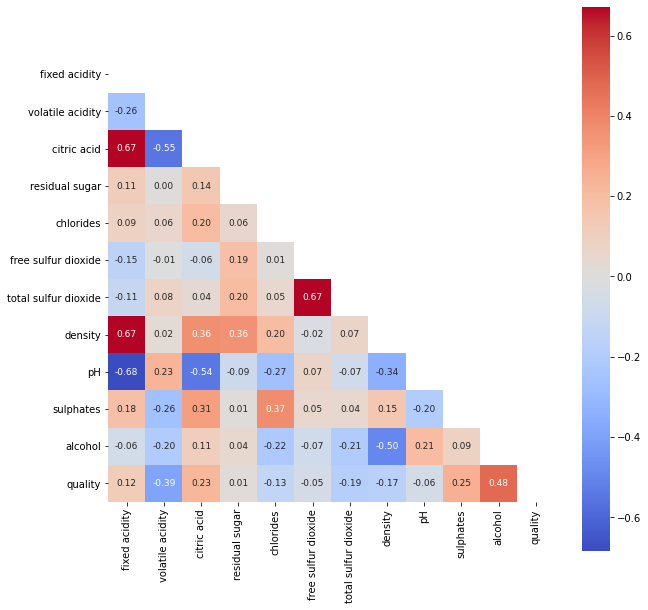

In [246]:
num_corr = red_wine.corr()
corr_triu = num_corr.where(np.triu(np.ones(num_corr.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(num_corr,annot=True, square=True, fmt='.2f',\
            annot_kws={'size':9}, mask = np.triu(corr_triu), cmap= "coolwarm")


- Variables with correlation to target variable less than 0.1 will be removed.
- Variables 'free sulfur dioxide' and 'total sulfur dioxide' are correlated, moreover correlation of variable 'free sulfur dioxide' to target variable is less than 0.1, so this variable will be removed.
- Variables 'citric acid' and 'density' are correlated with 'fixed acidity'. Variable 'fixed acidity' will be removed becasue it has the lowest correlation with target.

<H3>EDIT</H3>
- removal of above mentioned features caused worsening of ML models performance (presumably because there are a few of them), so I will keep them.

In [247]:
#cols_to_drop = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'pH']
#red_wine.drop(cols_to_drop, axis=1, inplace=True)
#red_wine.head()


<H3>Splitting data</H3>

- Splitting independent variables and labels into separate datasets - X will be the independent variables datatset and Y will be the target column.



In [248]:
X = red_wine.iloc[:, 0:-1]
Y = red_wine.iloc[:, -1:]

In [249]:
X_columns=X.columns

<H3>Standardizing the quantitative variables</H3>
- Orders of magnitudes of features are not varying to much (in worst case 3 orders of magnitude) and standardizing caused worsening of ML models performance, so I will not standardize the data.

In [250]:
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)

#X = pd.DataFrame(data=X, columns=X_columns)
#X.head()

<H3>Target variable imbalance</H3>

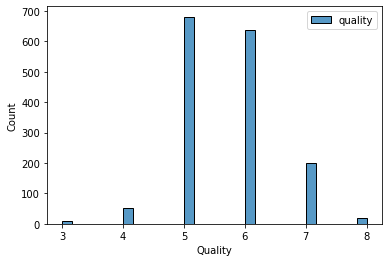

In [251]:
sns.histplot(data=Y)
plt.xlabel('Quality')
plt.show()

A dataset is imbalanced when the classification categories are not approximately equally represented, what is the case of this dataset. In order to overcome this problem, two methods are commonly used: undersampling and oversampling. In case of undersampling some data are randomly removed - because the analyzed dataset is small, this technique won't be used. In case of oversampling, a SMOTE (Synthetic Minority Over-sampling Technique) method can be used; in this method samples from smaller categories are synthetically prepared.

In [252]:
from imblearn.over_sampling import SMOTE

In [253]:
X, Y = SMOTE().fit_resample(X, Y)

In [254]:
Y.value_counts()

quality
3          681
4          681
5          681
6          681
7          681
8          681
dtype: int64

<H3>Train/Test Split</H3>

In [255]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

In [256]:
print(len(Y_train),len(Y_test))

3064 1022


<H3>Linear regression</H3>

In [257]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(X_train, Y_train)
y_pred=LR_model.predict(X_test)

In [258]:
print('Training set score: %.3f' % LR_model.score(X_train,Y_train))

Training set score: 0.746


In [259]:
print('Test set score: %.3f' % LR_model.score(X_test,Y_test))

Test set score: 0.707


<H3> Multinomial logistic regression</H3>

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
lr_model = LogisticRegression(multi_class="multinomial", max_iter=7000)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=7000, multi_class='multinomial')

In [262]:
lr_predictions = lr_model.predict(X_train)

In [263]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

           3       0.77      0.94      0.85       516
           4       0.57      0.51      0.54       516
           5       0.53      0.51      0.52       496
           6       0.40      0.30      0.34       488
           7       0.46      0.47      0.46       534
           8       0.62      0.72      0.67       514

    accuracy                           0.58      3064
   macro avg       0.56      0.57      0.56      3064
weighted avg       0.56      0.58      0.56      3064



In [264]:
lr_pred = lr_model.predict(X_test)
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           3       0.70      0.92      0.79       165
           4       0.49      0.46      0.48       165
           5       0.54      0.56      0.55       185
           6       0.47      0.24      0.32       193
           7       0.41      0.52      0.46       147
           8       0.61      0.65      0.63       167

    accuracy                           0.55      1022
   macro avg       0.54      0.56      0.54      1022
weighted avg       0.54      0.55      0.53      1022



In [265]:
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(lr_pred,Y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 54.89%


<H3> Decision tree </H3>

In [266]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state = 42, max_depth=10)
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [267]:
predictions = tree_model.predict(X_test)

In [268]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           3       0.91      0.99      0.95       165
           4       0.79      0.81      0.80       165
           5       0.68      0.53      0.60       185
           6       0.56      0.53      0.54       193
           7       0.70      0.78      0.74       147
           8       0.91      0.99      0.95       167

    accuracy                           0.76      1022
   macro avg       0.76      0.77      0.76      1022
weighted avg       0.75      0.76      0.75      1022



In [269]:
TreeAcc = accuracy_score(predictions,Y_test)
print('Decision tree model accuracy is: {:.2f}%'.format(TreeAcc*100))

Decision tree model accuracy is: 76.03%


In [270]:
#from sklearn import tree

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(tree_model, 
#                   feature_names=X.columns,  
#                   class_names=['3', '4', '5', '6', '7','8'],
#                   filled=True)



<H3> Random forest</H3>

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [272]:
forest=RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train,Y_train)
forest_pred=forest.predict(X_test)

In [273]:
print(classification_report(Y_test, forest_pred))

              precision    recall  f1-score   support

           3       0.95      1.00      0.97       165
           4       0.86      0.95      0.90       165
           5       0.72      0.74      0.73       185
           6       0.73      0.50      0.59       193
           7       0.80      0.93      0.86       147
           8       0.96      1.00      0.98       167

    accuracy                           0.84      1022
   macro avg       0.84      0.85      0.84      1022
weighted avg       0.83      0.84      0.83      1022



In [274]:
ForestAcc = accuracy_score(forest_pred,Y_test)
print('Random forest model accuracy is: {:.2f}%'.format(ForestAcc*100))

Random forest model accuracy is: 83.86%


<H3>Categorizing target value</H3>

- There is a possibillity, that reducing the number of target categories will improve classification models performance, as differences between less number of categories may be more distinct and easier to capture.
- Current 6 categories will be changed into following three groups: "poor" (3 and 4 points), "average" (5 and 6 points) and "good" (7 and 8 points). 

In [275]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [276]:
red_wine.shape

(1599, 12)

In [277]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [278]:
red_wine['quality'].replace({3: 'Poor', 4: 'Poor', 5:'Average',6:'Average',7:'Good',8:'Good'}, inplace=True)

In [279]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average


In [280]:
X_cat = red_wine.iloc[:, 0:-1]
Y_cat = red_wine.iloc[:, -1:]

<H3>Balancing new dataset</H3>

In [281]:
X_cat, Y_cat = SMOTE().fit_resample(X_cat, Y_cat)

In [282]:
Y_cat.value_counts()

quality
Average    1319
Good       1319
Poor       1319
dtype: int64

<H3>Train/Test Splitting</H3>

In [283]:
x_train, x_test, y_train, y_test = train_test_split(X_cat, Y_cat, test_size=0.25, random_state = 42)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

<H3> Multinomial logistic regression</H3>

In [284]:
cat_lr_model = LogisticRegression(multi_class="multinomial", max_iter=5000)
cat_lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [285]:
cat_lr_predictions = cat_lr_model.predict(x_train)

In [286]:
print(classification_report(y_train, cat_lr_predictions))

              precision    recall  f1-score   support

     Average       0.61      0.52      0.56       959
        Good       0.78      0.85      0.81       997
        Poor       0.74      0.77      0.76      1011

    accuracy                           0.72      2967
   macro avg       0.71      0.71      0.71      2967
weighted avg       0.71      0.72      0.71      2967



In [287]:
cat_lr_pred = cat_lr_model.predict(x_test)
print(classification_report(y_test, cat_lr_pred))

              precision    recall  f1-score   support

     Average       0.65      0.51      0.57       360
        Good       0.80      0.88      0.84       322
        Poor       0.65      0.74      0.69       308

    accuracy                           0.70       990
   macro avg       0.70      0.71      0.70       990
weighted avg       0.70      0.70      0.70       990



In [288]:
LRAcc = accuracy_score(cat_lr_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 70.30%


<H3>Decision tree</H3>

In [289]:
cat_tree_model = DecisionTreeClassifier(random_state = 42, max_depth=12)
cat_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [290]:
predictions = cat_tree_model.predict(x_test)

In [291]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     Average       0.90      0.74      0.81       360
        Good       0.86      0.94      0.90       322
        Poor       0.86      0.96      0.90       308

    accuracy                           0.87       990
   macro avg       0.87      0.88      0.87       990
weighted avg       0.87      0.87      0.87       990



In [292]:
TreeAcc = accuracy_score(predictions,y_test)
print('Decision tree model accuracy is: {:.2f}%'.format(TreeAcc*100))

Decision tree model accuracy is: 87.07%


In [293]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(cat_tree_model, 
#                   feature_names=X_cat.columns,  
#                   class_names=['Poor', 'Average', 'Good'],
#                   filled=True)

<H3> Random forest </H3>

In [294]:
cat_forest=RandomForestClassifier(n_estimators=100, random_state=42)
cat_forest.fit(x_train,y_train)
cat_forest_pred=cat_forest.predict(x_test)

In [295]:
print(classification_report(y_test, cat_forest_pred))

              precision    recall  f1-score   support

     Average       0.94      0.86      0.90       360
        Good       0.92      0.97      0.94       322
        Poor       0.92      0.98      0.95       308

    accuracy                           0.93       990
   macro avg       0.93      0.93      0.93       990
weighted avg       0.93      0.93      0.93       990



In [296]:
ForestAcc = accuracy_score(cat_forest_pred,y_test)
print('Random forest model accuracy is: {:.2f}%'.format(ForestAcc*100))

Random forest model accuracy is: 92.93%


Reducing the number of categores resulted in improvement of classification models:
- In the case of Multinomial Logistic Regression accuracy score increased from 55% to 70%.
- Accuracy of Decision Tree model increased from 76% to 87%.
- Accuracy of Random Forest model increased from 84% to 93%.

<H3>Permutation importance</H3>

In order to find the most important features determining quality of wine (for a given ML model) I will use method called permutation importance. In this method, for a fitted model, data in one of features are randomely shuffled. We are observing how this operation changes the performace of our model, which suffers the most if we shuffle a column that the model relied on heavily for predictions. Operation is repeated for all features and we are choosing the most important ones.

[Description based on Kaggle tutorial: https://www.kaggle.com/dansbecker/permutation-importance]

<H4>Decision tree</H4>

In [297]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(cat_tree_model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())


Weight,Feature
0.2295 ± 0.0225,alcohol
0.2069 ± 0.0304,sulphates
0.1911 ± 0.0176,volatile acidity
0.1319 ± 0.0094,total sulfur dioxide
0.0954 ± 0.0124,free sulfur dioxide
0.0917 ± 0.0083,pH
0.0826 ± 0.0059,citric acid
0.0501 ± 0.0145,residual sugar
0.0364 ± 0.0064,chlorides
0.0333 ± 0.0101,fixed acidity


<H4>Random forest</H4>

In [298]:
cat_forest_perm = PermutationImportance(cat_forest, random_state=1).fit(x_test, y_test)
eli5.show_weights(cat_forest_perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.1960 ± 0.0196,sulphates
0.1677 ± 0.0126,alcohol
0.1479 ± 0.0129,volatile acidity
0.0624 ± 0.0067,total sulfur dioxide
0.0556 ± 0.0061,pH
0.0279 ± 0.0090,free sulfur dioxide
0.0196 ± 0.0052,citric acid
0.0168 ± 0.0071,fixed acidity
0.0162 ± 0.0051,residual sugar
0.0133 ± 0.0041,chlorides


In both models the most important features are:
- Alcohol content,
- Sulphates (potassium sulphate) content,
- Volatile acidity (acetic acid content).

The same emerges from correlaton data as correlation coefficient for wine Quality vs:
- Alcohol content is: 0.48,
- Sulphates content is: 0.25,
- Volatile acidity is: -0.39.

All above mentioned correlation coefficients are the highest in the whole dataset.    